## First Graph: Building the Graph

### Set the OpenAI API Key as an Environment Variable

In [1]:
%load_ext dotenv
%dotenv
%load_ext mypy_ipython

### Import Relevant Classes and Functions

In [2]:
from langgraph.graph import START, END, StateGraph
from typing_extensions import TypedDict
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_core.runnables import Runnable
from collections.abc import Sequence

### Define the State

In [3]:
class State(TypedDict):
    messages: Sequence[BaseMessage]

In [4]:
state = State(messages = [HumanMessage("Could you tell me a grook by Piet Hein?")])

In [5]:
state["messages"][0].pretty_print()

================================ Human Message =================================

Could you tell me a grook by Piet Hein?


### Define the Nodes

In [ ]:
chat = ChatGroq(model = "llama-3.1-8b-instant",
                temperature = 0, 
                max_tokens = 100)

In [9]:
response = chat.invoke(state["messages"])

In [10]:
response.pretty_print()

================================== Ai Message ==================================

Piet Hein was a Danish poet known for his short, witty poems called "grooks." Here's one:

"Life is not a problem to be solved,
But a reality to be experienced.
The answer lies not in the solution,
But in the living of the question."

This grook captures the essence of living in the moment and finding meaning in the experience itself, rather than seeking a specific outcome or solution.


In [11]:
def chatbot(state: State) -> State:
    
    print(f"\n-------> ENTERING chatbot:")
    
    response = chat.invoke(state["messages"])
    response.pretty_print()
    
    return State(messages = [response])

In [12]:
chatbot(state)


-------> ENTERING chatbot:
================================== Ai Message ==================================

Piet Hein was a Danish poet known for his short, witty poems called "grooks." Here's one:

"Life is not a problem to be solved,
But a reality to be experienced.
The answer lies not in the solution,
But in the living of the question."

This grook captures the essence of living in the moment and finding meaning in the experience itself, rather than seeking a specific outcome or solution.


{'messages': [AIMessage(content='Piet Hein was a Danish poet known for his short, witty poems called "grooks." Here\'s one:\n\n"Life is not a problem to be solved,\nBut a reality to be experienced.\nThe answer lies not in the solution,\nBut in the living of the question."\n\nThis grook captures the essence of living in the moment and finding meaning in the experience itself, rather than seeking a specific outcome or solution.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 46, 'total_tokens': 131, 'completion_time': 0.159511889, 'prompt_time': 0.002507557, 'queue_time': 0.089356817, 'total_time': 0.162019446}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--9bc3786f-2063-44c7-a57e-9e70b026599f-0', usage_metadata={'input_tokens': 46, 'output_tokens': 85, 'total_tokens': 131})]}

### Define the Graph

In [13]:
graph = StateGraph(State)

In [14]:
graph.add_node("chatbot", chatbot)

graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

In [15]:
graph_compiled = graph.compile()

In [16]:
isinstance(graph, Runnable)

False

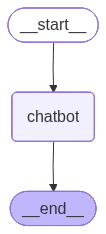

In [17]:
graph_compiled

### Test the Graph

In [18]:
graph_compiled.invoke(state)


-------> ENTERING chatbot:
================================== Ai Message ==================================

Piet Hein was a Danish poet known for his short, witty poems called "grooks." Here's one:

"Life is not a problem to be solved,
But a reality to be experienced.
The answer lies not in the solution,
But in the living of the question."

This grook captures the essence of living in the moment and finding meaning in the experience itself, rather than seeking a specific outcome or solution.


{'messages': [AIMessage(content='Piet Hein was a Danish poet known for his short, witty poems called "grooks." Here\'s one:\n\n"Life is not a problem to be solved,\nBut a reality to be experienced.\nThe answer lies not in the solution,\nBut in the living of the question."\n\nThis grook captures the essence of living in the moment and finding meaning in the experience itself, rather than seeking a specific outcome or solution.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 46, 'total_tokens': 131, 'completion_time': 0.159028211, 'prompt_time': 0.002142847, 'queue_time': 0.087858956, 'total_time': 0.161171058}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--b01f0a31-3bcc-4c01-b175-a016690e20eb-0', usage_metadata={'input_tokens': 46, 'output_tokens': 85, 'total_tokens': 131})]}

In [19]:
%mypy

    graph_compiled.invoke(state)
error: Argument 1 to "invoke" of "Pregel" has incompatible type "State"; expected "StateT | Command[Any] | None"  [arg-type]
Found 1 error in 1 file (checked 1 source file)


Type checking failed
